# Redes Convolucionales Sep-Dic 2023

Victor Ramos 17-10518



In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models
import torchvision.datasets as datasets
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.utils.data import random_split
from torch.utils.data import sampler
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import  f1_score, accuracy_score, confusion_matrix
from google.colab import drive

In [2]:
drive.mount('/content/drive')

%cd /content/drive/MyDrive/CNN_Final_Project
%ls

Mounted at /content/drive
/content/drive/MyDrive/CNN_Final_Project
DATA/  data_src/  Training_Model.pt


In [3]:
transform = transforms.Compose(
    [ToTensor(),
     transforms.Normalize(mean =[0.5, 0.5, 0.5], std =[0.22, 0.22, 0.22])])

batch_size = 10

train_set = torchvision.datasets.CIFAR100(root='./data_src', train=True, download=True, transform=transform)
test_set = torchvision.datasets.CIFAR100(root='./data_src', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=4)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=4)
validation_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, sampler=sampler.SubsetRandomSampler(range(10000)), num_workers=4)

classes = train_set.classes
PATH = "./DATA/DATA.pth"
train = torch.save(
                    {"train_loader": train_loader,
                     "test_loader": test_loader,
                     "validation_loader": validation_loader,
                     "classes": classes,
                     "batch_size": batch_size,}, PATH,
)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


#Muestra del Train_Loader#

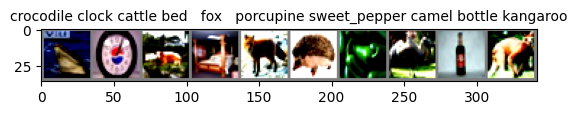

In [4]:
def imagenshow(img):
    img = img / 2 + 0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)), fontsize=10)
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

imagenshow(torchvision.utils.make_grid(images,nrow=10))



#Muestra del Test_Loader#

---



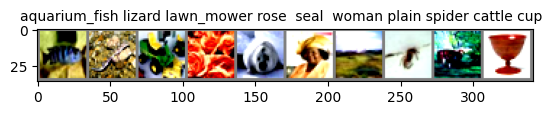

In [5]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

imagenshow(torchvision.utils.make_grid(images,nrow=10))

In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [7]:
def conv(channels, out_channels, pool=False):
    layers = [
        nn.Conv2d(channels, out_channels, kernel_size=3, padding=1),
        nn.BatchNorm2d(out_channels),
        nn.ReLU(inplace=True),
    ]
    if pool:
        layers.append(nn.MaxPool2d(2))
    return nn.Sequential(*layers)



class CNN1(nn.Module):
    def __init__(self):
   #     super().__init__()
    #    self.conv1 = nn.Conv2d(3, 20, 5)
     #   self.pool = nn.MaxPool2d(2, 2)
      #  self.conv2 = nn.Conv2d(20, 40, 5)
      #  self.pool = nn.MaxPool2d(2, 2)
      #  self.conv3 = nn.Conv2d(40, 60, 5)
      #  self.fc1 = nn.Linear(40* 5* 5, 420)
      #  self.fc2 = nn.Linear(420, 180)
      #  self.fc3 = nn.Linear(180, 80)
      #  self.fc4 = nn.Linear(80, 20)
        super().__init__()

        self.conv1 = conv(3, 100)
        self.conv2 = conv(100, 150, pool=True)
        self.res1 = nn.Sequential(conv(150, 150), conv(150, 150))

        self.conv3 = conv(150, 200, pool=True)
        self.conv4 = conv(200, 300, pool=True)
        self.res2 = nn.Sequential(conv(300, 300), conv(300, 300))

        self.classifier = nn.Sequential(
            nn.MaxPool2d(4),
            nn.Flatten(),
            nn.Dropout(p=0.2),
            nn.Linear(300, 100))




    def forward(self, x):
 #       x = self.pool(F.relu(self.conv1(x)))
 #       x = self.pool(F.relu(self.conv2(x)))
 #       x = torch.flatten(x, 1)
 #       x = F.selu(self.fc1(x))
 #       x = F.selu(self.fc2(x))
 #       x = F.selu(self.fc3(x))
 #       x = self.fc4(x)
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.res1(x) + x
        x = self.conv3(x)
        x = self.conv4(x)
        x = self.res2(x) + x
        x = self.classifier(x)
        return x


Resnet = CNN1()
Resnet.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(Resnet.parameters(), lr=0.005, momentum=0.80)

Entrenamiento de la CNN

Se realiza la iteracion sobre el train_loader, al final de cada epoca se muestra la funcion de perdida, entrenamos durante 10 décadas

In [8]:
PATH = "./DATA/DATA.pth"
dataset = torch.load(PATH)
print(dataset)

{'train_loader': <torch.utils.data.dataloader.DataLoader object at 0x7d043eb4c400>, 'test_loader': <torch.utils.data.dataloader.DataLoader object at 0x7d043eb4eb00>, 'validation_loader': <torch.utils.data.dataloader.DataLoader object at 0x7d043eb4f190>, 'classes': ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 's

In [9]:
import time

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [10]:

array_train_loss= []
array_validation_loss= []

Nro_epocas = 30

for epoch in range(Nro_epocas):
    valid_loss = 0.0
    running_loss = 0.0
    inicio = time.time()

  #  for i, data in enumerate(train_loader, 0):
 #       inputs, labels = data
      #  if (torch.cuda.is_available()):
      #    inputs, labels = data.cuda()

    for inputs, labels in dataset["train_loader"]:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        optimizer.zero_grad()
        outputs = Resnet(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    Resnet.eval()

  #  for i, data in enumerate(validation_loader,0):
    #    if torch.cuda.is_available():
       #     inputs, labels = data.cuda()
    for inputs, labels in dataset["validation_loader"]:
        if torch.cuda.is_available():
            inputs, labels = inputs.cuda(), labels.cuda()
        outputs = Resnet(inputs)
        loss = criterion(outputs, labels)
        valid_loss += loss.item()

    running_loss = running_loss /len(train_loader)
    print(print("\n[Para la epoca", epoch + 1, "] \nloss:", running_loss))


    valid_loss = valid_loss / len(validation_loader)
    print("\n val_loss:", valid_loss)

    array_train_loss.append(running_loss)
    array_validation_loss.append(valid_loss)

    fin = time.time()
    duracion = fin - inicio
    print("La duracion de la epoca", epoch+1, "es de", duracion, "segundos.")

print('Entrenamiento finalizado')


[Para la epoca 1 ] 
loss: 4.106355204248429
None

 val_loss: 3.2656211520433427
La duracion de la epoca 1 es de 64.02079439163208 segundos.

[Para la epoca 2 ] 
loss: 2.8559169702649116
None

 val_loss: 2.324187269449234
La duracion de la epoca 2 es de 60.09144854545593 segundos.

[Para la epoca 3 ] 
loss: 2.1481675665855406
None

 val_loss: 1.793122592329979
La duracion de la epoca 3 es de 61.455384731292725 segundos.

[Para la epoca 4 ] 
loss: 1.7343463566601276
None

 val_loss: 1.3453164724707602
La duracion de la epoca 4 es de 58.27692914009094 segundos.

[Para la epoca 5 ] 
loss: 1.4329412024915218
None

 val_loss: 1.0978841388076543
La duracion de la epoca 5 es de 58.90374135971069 segundos.

[Para la epoca 6 ] 
loss: 1.1696282445520163
None

 val_loss: 0.8264782351627946
La duracion de la epoca 6 es de 58.80577754974365 segundos.

[Para la epoca 7 ] 
loss: 0.9370739415567368
None

 val_loss: 0.6810578907206655
La duracion de la epoca 7 es de 60.828081130981445 segundos.

[Para 

Carga del modelo entrenado en la carpeta 'Training_Model.pt'

In [11]:
print(array_train_loss)
print(len(train_loader))
print(array_validation_loss)
print(len(validation_loader))

[4.106355204248429, 2.8559169702649116, 2.1481675665855406, 1.7343463566601276, 1.4329412024915218, 1.1696282445520163, 0.9370739415567368, 0.7407293602637947, 0.5650872956093401, 0.4415122791719157, 0.35991060878500575, 0.2964560899307718, 0.24438819416639163, 0.2017251404658571, 0.16808080225673622, 0.15201556620151097, 0.13799186814867062, 0.10186153915424147, 0.1024848573453095, 0.09348779599661543, 0.08769469215675804, 0.07884713447544672, 0.06067676537295215, 0.06569407265776676, 0.066513595598396, 0.06775971959094158, 0.05061247165998182, 0.04948547675853711, 0.044351027262750364, 0.035196964872869003]
5000
[3.2656211520433427, 2.324187269449234, 1.793122592329979, 1.3453164724707602, 1.0978841388076543, 0.8264782351627946, 0.6810578907206655, 0.557112075118348, 0.31866398963239045, 0.29532033373834565, 0.2682061217352748, 0.24191274067084306, 0.153536894369754, 0.14664221832182375, 0.08535420184111718, 0.13927713915143977, 0.07926974558763322, 0.13498861441083135, 0.08313544525

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


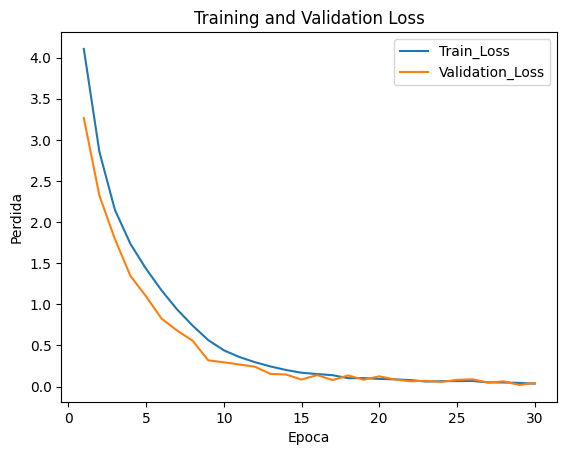

In [14]:
epocas = list(range(1, epoch+2))
print(epocas)

plt.plot(epocas, array_train_loss , label="Train_Loss")
plt.plot(epocas, array_validation_loss , label="Validation_Loss")
plt.title("Training and Validation Loss")
plt.xlabel("Epoca")
plt.ylabel("Perdida")
plt.legend()

In [15]:

PATH = './Training_Model.pt'
torch.save({
            'epoch': epoch,
            'model_state_dict': Resnet.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': running_loss,
            }, PATH)


Calculo de la precision del modelo

In [16]:
correct = 0
total = 0
with torch.no_grad():
    for images, labels in test_loader:
       # images, labels = data
        if torch.cuda.is_available():
            images, labels = images.cuda(), labels.cuda()
        outputs = Resnet(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Precision de la CNN en la prueba de 10000 imagenes:{100 * correct // total} %')

Precision de la CNN en la prueba de 10000 imagenes:55 %


In [17]:
class_name = train_set.classes
print(class_name)
correct_predictions = [0] * len(class_name)
total_images = [0] * len(class_name)

for images, labels in dataset["test_loader"]:
    #images, labels = data
    if torch.cuda.is_available():
        images, labels = images.cuda(), labels.cuda()
    outputs = Resnet(images)
    _, predicted = torch.max(outputs.data, 1)
    for i in range(len(labels)):
        label = labels[i]
        prediction = predicted[i]
        if label == prediction:
          correct_predictions[label] += 1
        total_images[label] += 1


    running_loss = running_loss /len(train_loader)

class_accuracy = [100*correct_predictions[i] / total_images[i] for i in range(len(class_name))]

for key in range(len(class_name)):
    print(f'Precision de la clase {class_name[key]} en la prueba de 10000 imagenes:{class_accuracy[key]} %')

['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard', 'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree',

Mapa de Calor

Para la primera capa convolucional el mapa de calor nos permite visualizar cuales son las regiones de activacion mas importantes



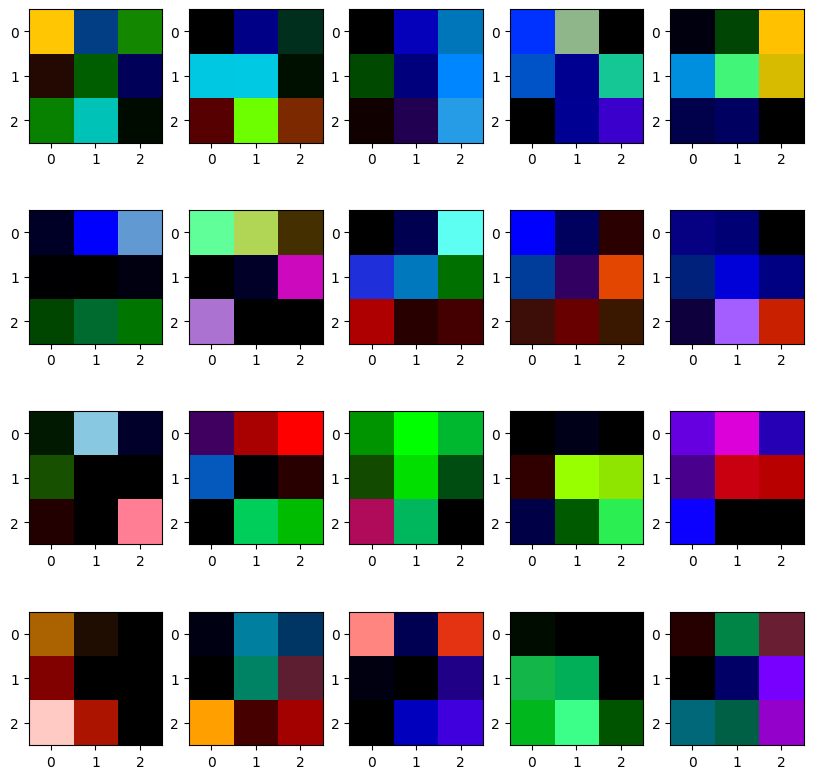

In [21]:

weight1 = []

for x in Resnet.state_dict()['conv1.0.weight'].cpu():
      w1 = np.transpose(x)
      w1 = w1/w1.max()
      w1 = np.clip(w1, 0, 1)
      weight1.append(w1)

figure, axes = plt.subplots(nrows=4, ncols=5, figsize =(10,10))

for a, b in zip(axes.ravel(), range(20)):
  nimage = np.random.randint(len(weight1))
  a.imshow(weight1[b])


Para la segunda capa, podemos observar que los patrones de la zona de activacion generalmente se encuentran en las esquinas de la imagen



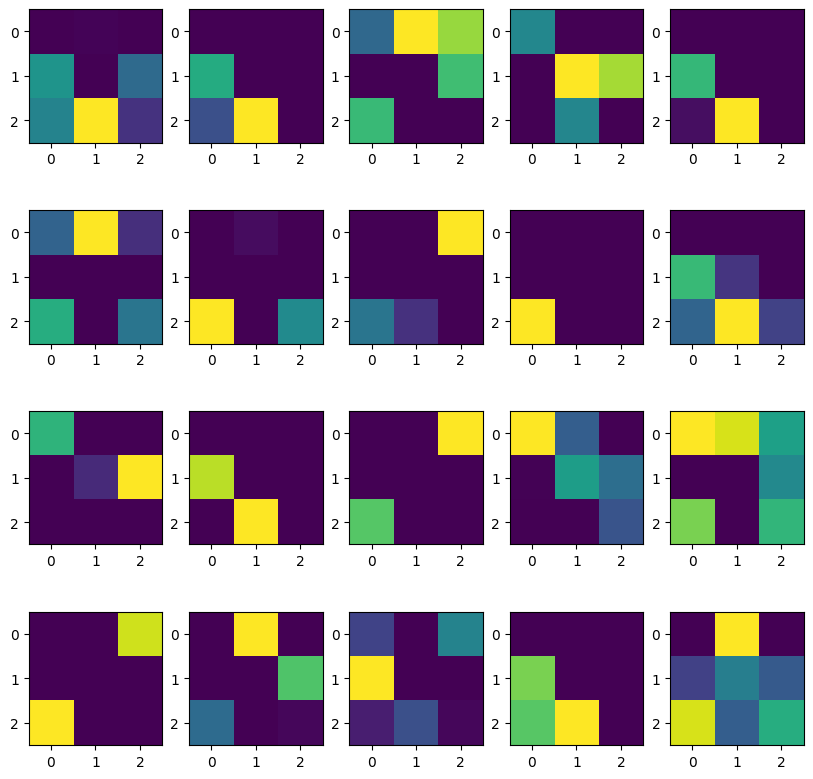

In [22]:
weight2 = []
for x in Resnet.state_dict()['conv2.0.weight'].cpu():
  for w in x:
      w2 = w
      w2 = w2/w2.max()
      w2 = np.clip(w2, 0, 1)
      weight2.append(w2)

figure, axes = plt.subplots(nrows=4, ncols=5, figsize =(10,10))

for a, b in zip(axes.ravel(), range(30)):
  nimage = np.random.randint(len(weight2))
  a.imshow(weight2[b])

#Conclusion#

Al entrenar el modelo, se logro una precision del 55% al implementar la red residual de 9 capas, Resnet, y aumentar la cantidad de epocas

Podemos ver que la precision por clase tambien presenta numeros aceptables, en su mayoria por encima del 50%.
